In [21]:
import numpy as np
import pandas as pd
from combination import partitions
from math import *
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

NameError: name 'ts' is not defined

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
Y_id = df_test.id
df_train.drop(['id'],axis=1,inplace=True)
df_test.drop(['id'],axis=1,inplace=True)

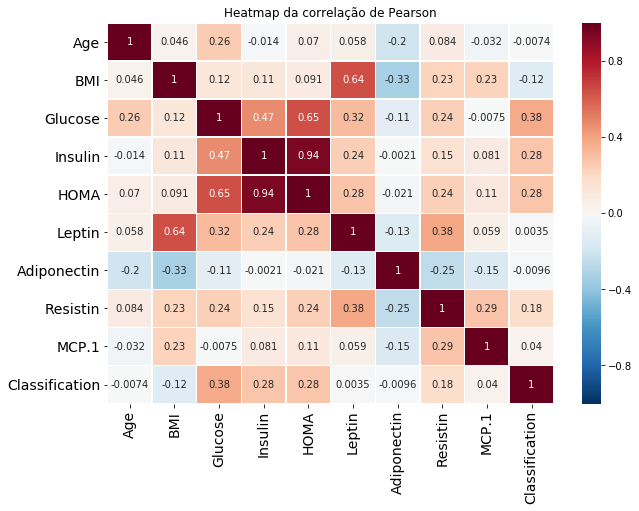

In [4]:
plt.figure(figsize = (10,7))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

corr = df_train.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,vmin=-1, vmax=1,linewidths=.5, cmap = "RdBu_r",annot=True)
plt.title('Heatmap da correlação de Pearson')
plt.show()

In [5]:
df_train.drop(['Age', 'Leptin', 'Adiponectin'], axis=1, inplace=True)
df_test.drop(['Age', 'Leptin', 'Adiponectin'], axis=1, inplace=True)

In [6]:
input_neurons_amount, output_neurons_amount = len(df_train.columns), 2

In [7]:
def hidden_neurons_amount(alpha):
    return alpha * sqrt(input_neurons_amount * output_neurons_amount)

def condition_to_insert(partition):
    return len(partition) <= 2

In [8]:
alpha = [0.5, 2, 3]
hidden_neurons_amounts = [ceil(hidden_neurons_amount(a)) for a in alpha]
hidden_layer_sizes = []

for n in hidden_neurons_amounts:
    tuples = partitions(n, condition_to_insert)
    hidden_layer_sizes += tuples

In [9]:
params = {
    'activation': ['identity', 'logistic','tanh','relu'],
    'hidden_layer_sizes': hidden_layer_sizes,
    'solver': ['lbfgs']
}

In [10]:
gs = GridSearchCV(MLPClassifier(), params, cv=3, scoring='f1_micro', return_train_score=False)

In [11]:
Y_train = df_train.Classification
X_train = df_train.drop(['Classification'],axis=1)

In [12]:
gs.fit(X_train, Y_train);

In [13]:
best_model = gs.best_estimator_

In [14]:
Y_pred = best_model.predict(df_test)

In [15]:
results = pd.DataFrame(data={'Classification' : Y_pred, 'id' : Y_id})

In [16]:
results.to_csv('result.csv', index=False)

In [18]:
time.time()

1543118160.5630207

In [ ]:
import datetime
>>> st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
>>> print st